In [79]:
import pandas as pd
import seaborn as sb
import json

In [80]:
dfBeersReview = pd.read_csv("beer_reviews.csv")
dfBeersRecipe = pd.read_csv("recipeData.csv")

In [81]:
dfBeersReview.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [82]:
dfBeersRecipe.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [83]:
dfBeersReview = dfBeersReview.drop(columns=["brewery_id", "review_time", "review_profilename", "beer_beerid"])
dfBeersReview.head()

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv
0,Vecchio Birraio,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0
1,Vecchio Birraio,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2
2,Vecchio Birraio,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5
3,Vecchio Birraio,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0
4,Caldera Brewing Company,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7


In [84]:
dfBeersRecipe = dfBeersRecipe.drop(columns=["URL", "BeerID", "Style", "StyleID", "Size(L)", "MashThickness", "SugarScale", "BrewMethod", "PitchRate", "PrimaryTemp", "PrimingMethod", "PrimingAmount", "UserId", "BoilGravity"])
dfBeersRecipe.head()

,Name,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
0,Vanilla Cream Ale,1.055,1.013,5.48,17.65,4.83,28.39,75,70.0
1,Southern Tier Pumking clone,1.083,1.021,8.16,60.65,15.64,24.61,60,70.0
2,Zombie Dust Clone - EXTRACT,1.063,1.018,5.91,59.25,8.98,22.71,60,70.0
3,Zombie Dust Clone - ALL GRAIN,1.061,1.017,5.80,54.48,8.50,26.50,60,70.0
4,Bakke Brygg Belgisk Blonde 50 l,1.060,1.010,6.48,17.84,4.57,60.00,90,72.0


In [85]:
dfBeersRecipe = dfBeersRecipe.rename(columns={'Name': 'beer_name'})
dfBeersRecipe.head()

,beer_name,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
0,Vanilla Cream Ale,1.055,1.013,5.48,17.65,4.83,28.39,75,70.0
1,Southern Tier Pumking clone,1.083,1.021,8.16,60.65,15.64,24.61,60,70.0
2,Zombie Dust Clone - EXTRACT,1.063,1.018,5.91,59.25,8.98,22.71,60,70.0
3,Zombie Dust Clone - ALL GRAIN,1.061,1.017,5.80,54.48,8.50,26.50,60,70.0
4,Bakke Brygg Belgisk Blonde 50 l,1.060,1.010,6.48,17.84,4.57,60.00,90,72.0


In [86]:
#dfBeersReview[dfBeersReview['review_overall'].isnull()]
#dfBeersReview[dfBeersReview['review_aroma'].isnull()]
#dfBeersReview[dfBeersReview['review_appearance'].isnull()]
#dfBeersReview[dfBeersReview['review_palate'].isnull()]
#dfBeersReview[dfBeersReview['review_taste'].isnull()]
dfBeersReview[dfBeersReview['beer_abv'].isnull()]
#dfBeersReview[dfBeersReview['beer_name'].isnull()]
#dfBeersReview[dfBeersReview['beer_style'].isnull()]

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv
273,Caldera Brewing Company,3.0,3.0,3.0,American Stout,4.0,3.0,Cauldron Espresso Stout,NaN
430,Moon River Brewing Company,3.5,4.0,4.5,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN
603,Moon River Brewing Company,4.0,3.5,4.0,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN
733,Caldera Brewing Company,4.0,4.0,4.0,American IPA,4.0,4.0,Alpha Beta,NaN
798,Caldera Brewing Company,4.5,4.5,4.0,American Double / Imperial Stout,4.0,4.5,Imperial Stout,NaN
...,...,...,...,...,...,...,...,...,...
1586568,The Defiant Brewing Company,4.0,3.5,4.0,Bock,4.0,4.0,Bock,NaN
1586587,The Defiant Brewing Company,3.5,4.5,4.0,Maibock / Helles Bock,4.5,4.0,Maibock,NaN
1586596,The Defiant Brewing Company,4.0,3.0,5.0,Belgian Strong Pale Ale,4.0,3.5,Resolution #2,NaN
1586597,The Defiant Brewing Company,4.5,4.5,4.0,Belgian Strong Pale Ale,4.0,4.0,Resolution #2,NaN


In [87]:
dfBeersRecipe[dfBeersRecipe['beer_name'].isnull()]

,beer_name,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
28051,NaN,1.002,1.001,0.22,0.0,0.53,22.71,60,70.0


In [88]:
dfBeersRecipe[dfBeersRecipe['OG']>1.000][dfBeersRecipe['OG']<1.003][dfBeersRecipe['FG']>=1.000][dfBeersRecipe['FG']<=1.002][dfBeersRecipe['ABV']>=0.20][dfBeersRecipe['ABV']<=0.24]

<ipython-input-88-480f56e31ab5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfBeersRecipe[dfBeersRecipe['OG']>1.000][dfBeersRecipe['OG']<1.003][dfBeersRecipe['FG']>=1.000][dfBeersRecipe['FG']<=1.002][dfBeersRecipe['ABV']>=0.20][dfBeersRecipe['ABV']<=0.24]
<ipython-input-88-480f56e31ab5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfBeersRecipe[dfBeersRecipe['OG']>1.000][dfBeersRecipe['OG']<1.003][dfBeersRecipe['FG']>=1.000][dfBeersRecipe['FG']<=1.002][dfBeersRecipe['ABV']>=0.20][dfBeersRecipe['ABV']<=0.24]
<ipython-input-88-480f56e31ab5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfBeersRecipe[dfBeersRecipe['OG']>1.000][dfBeersRecipe['OG']<1.003][dfBeersRecipe['FG']>=1.000][dfBeersRecipe['FG']<=1.002][dfBeersRecipe['ABV']>=0.20][dfBeersRecipe['ABV']<=0.24]
<ipython-input-88-480f56e31ab5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfBeersR

,beer_name,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
28051,NaN,1.002,1.001,0.22,0.00,0.53,22.71,60,70.0
38632,Punkinhead Wheat,1.002,1.001,0.21,19.79,1.18,27.44,60,65.0
42917,Spice Cookie Stout,1.002,1.001,0.21,0.00,0.80,28.39,60,35.0
62507,Test Custom Mashable,1.002,1.001,0.21,0.00,2.97,28.39,60,70.0


In [89]:
dfBeersRecipe =  dfBeersRecipe.groupby('beer_name').mean()
dfBeersRecipe

,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
beer_name,,,,,,,,
\tImperial Nut Brown Maple Chai,1.1070,1.01900,11.55,70.57,30.85,28.39,60.0,65.0
\tMaple Brown Ale,1.0730,1.01800,7.23,53.85,22.36,30.28,60.0,75.0
\tTempe Closet Oatmeal Milk Brown,16.4312,7.03775,5.17,25.86,21.16,26.50,90.0,70.0
!!! Citra Pale !!!,1.0660,1.01700,6.50,60.52,7.13,47.32,60.0,75.0
!!! IPA !!!,1.0760,1.01900,7.50,72.36,10.48,47.32,90.0,75.0
...,...,...,...,...,...,...,...,...
�vralids old oak,1.0720,1.02000,6.82,35.88,15.07,16.00,60.0,70.0
�vslapps�l,1.0690,1.01900,6.56,73.46,9.24,13.00,60.0,70.0
�yvind porter,1.0950,1.01800,10.12,45.67,39.38,31.00,60.0,85.0


In [90]:
beersReviewANDRecipe = pd.merge(dfBeersReview,dfBeersRecipe,on = "beer_name")
beersReviewANDRecipe

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
0,Broad Ripple Brew Pub,4.0,3.5,4.0,English Brown Ale,3.5,3.5,Nut Brown,4.7,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
1,District ChopHouse & Brewery,4.0,4.0,4.0,English Brown Ale,4.0,4.0,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
2,District ChopHouse & Brewery,4.0,3.0,3.5,English Brown Ale,4.0,4.0,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
3,District ChopHouse & Brewery,3.0,2.5,3.5,English Brown Ale,3.0,3.5,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
4,District ChopHouse & Brewery,3.5,3.0,3.5,English Brown Ale,3.5,3.0,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205697,The Defiant Brewing Company,4.0,4.0,3.5,American IPA,4.5,4.0,Medusa IPA,6.5,1.062,1.012500,6.530000,63.705000,9.460000,55.835000,60.000000,72.500000
205698,The Defiant Brewing Company,4.5,4.0,4.0,American IPA,4.0,4.5,Medusa IPA,6.5,1.062,1.012500,6.530000,63.705000,9.460000,55.835000,60.000000,72.500000
205699,The Defiant Brewing Company,4.0,4.0,4.5,American IPA,4.0,4.0,Medusa IPA,6.5,1.062,1.012500,6.530000,63.705000,9.460000,55.835000,60.000000,72.500000
205700,The Defiant Brewing Company,4.5,5.0,5.0,Russian Imperial Stout,4.5,4.5,Death,15.0,1.085,1.018000,8.800000,44.790000,8.870000,24.610000,60.000000,70.000000


In [14]:
for el in beersReviewANDRecipe[["beer_name","beer_abv", "ABV"]]:
    print(el)
    if(el["beer_abv"] == None):
        el["beer_abv"] = beersReviewANDRecipe[beersReviewANDRecipe[el["beer_name"]]['ABV']]

beer_name


TypeError: string indices must be integers

In [15]:
beersReviewANDRecipe["beer_abv"] = beersReviewANDRecipe["ABV"]

In [16]:
beersReviewANDRecipe[beersReviewANDRecipe['beer_abv'].isnull()]

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency


In [17]:
beersReviewANDRecipe[beersReviewANDRecipe['beer_abv'].isnull()]

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency


In [18]:
beersReviewANDRecipe = beersReviewANDRecipe.drop(columns=["ABV"])
beersReviewANDRecipe.head()

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,OG,FG,IBU,Color,BoilSize,BoilTime,Efficiency
0,Broad Ripple Brew Pub,4.0,3.5,4.0,English Brown Ale,3.5,3.5,Nut Brown,5.031818,1.051,1.012636,27.233636,20.935455,21.093636,57.727273,57.090909
1,District ChopHouse & Brewery,4.0,4.0,4.0,English Brown Ale,4.0,4.0,Nut Brown,5.031818,1.051,1.012636,27.233636,20.935455,21.093636,57.727273,57.090909
2,District ChopHouse & Brewery,4.0,3.0,3.5,English Brown Ale,4.0,4.0,Nut Brown,5.031818,1.051,1.012636,27.233636,20.935455,21.093636,57.727273,57.090909
3,District ChopHouse & Brewery,3.0,2.5,3.5,English Brown Ale,3.0,3.5,Nut Brown,5.031818,1.051,1.012636,27.233636,20.935455,21.093636,57.727273,57.090909
4,District ChopHouse & Brewery,3.5,3.0,3.5,English Brown Ale,3.5,3.0,Nut Brown,5.031818,1.051,1.012636,27.233636,20.935455,21.093636,57.727273,57.090909


In [19]:
beersByName =  beersReviewANDRecipe.groupby('beer_name').mean()
beersByName

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,OG,FG,IBU,Color,BoilSize,BoilTime,Efficiency
beer_name,,,,,,,,,,,,,
#14,3.857143,3.785714,3.857143,3.714286,3.785714,6.015000,7.305500,1.90087,58.485000,7.425000,23.100000,65.000000,67.000000
#9,3.539528,3.434466,3.501040,3.398058,3.396671,5.380000,13.099200,3.06868,28.960000,47.970000,28.000000,60.000000,70.000000
'Tis The Saison,3.750000,3.250000,2.500000,4.000000,3.750000,4.890000,1.048000,1.01100,25.390000,7.690000,24.610000,60.000000,70.000000
4x4,4.000000,3.500000,3.666667,3.666667,3.833333,5.520000,1.058000,1.01600,63.340000,32.500000,25.000000,90.000000,83.000000
60 Minute IPA,4.172727,3.996768,3.966061,4.006667,4.118990,6.210000,1.058000,1.01100,65.700000,3.510000,22.000000,60.000000,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yule,3.500000,4.000000,4.000000,3.000000,4.000000,7.520000,1.071000,1.01300,54.700000,19.650000,11.360000,60.000000,80.000000
Yuletide Ale,3.923077,3.576923,3.769231,3.653846,3.730769,7.540000,1.077000,1.01900,20.590000,17.480000,6.000000,60.000000,35.000000
Zombie Dust,4.512723,4.543257,4.215013,4.258270,4.492366,6.233478,1.063565,1.01600,63.047391,8.803478,27.713913,63.913043,68.043478


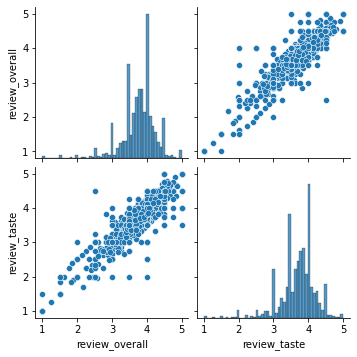

In [20]:
col = ["review_overall", "review_taste"]
g = sb.pairplot(
    data=beersByName[col]
)

<AxesSubplot:>

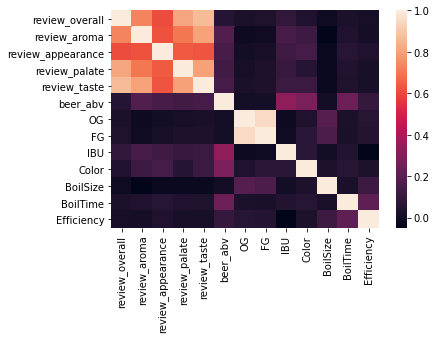

In [21]:
sb.heatmap(beersByName.corr())

In [22]:
beersByName.corr()["review_overall"].sort_values(ascending=False)

review_overall       1.000000
review_taste         0.867247
review_palate        0.814251
review_aroma         0.731748
review_appearance    0.609474
IBU                  0.086274
beer_abv             0.054998
Color                0.037074
FG                   0.035013
OG                   0.027845
BoilTime             0.024821
Efficiency           0.015177
BoilSize            -0.008599
Name: review_overall, dtype: float64

In [23]:
beersByName.corr()["IBU"].sort_values(ascending=False)


IBU                  1.000000
beer_abv             0.328515
review_aroma         0.150086
review_appearance    0.126374
review_taste         0.114800
review_palate        0.105020
review_overall       0.086274
Color                0.068201
BoilTime             0.045874
BoilSize             0.002037
FG                  -0.009389
OG                  -0.013387
Efficiency          -0.045924
Name: IBU, dtype: float64

In [24]:
#beersByName = beersByName.reset_index()
beersByName.sort_values(by="beer_abv", ascending=False)[["beer_name", "beer_abv"]].head(10)

,beer_name,beer_abv
1221,Maximus,20.44
1848,Tokyo,18.26
278,Black Tokyo Horizon,17.46
168,Belgian Barley Wine,16.08
1128,Kasteel Donker,12.18
1891,V,12.01
1477,Quilter's Irish Death,11.95
770,Fireside,11.89
146,Baronen,11.82
692,Eisbock,11.82


In [25]:
beersByb =  beersReviewANDRecipe.groupby('brewery_name').mean()
beersByb

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,OG,FG,IBU,Color,BoilSize,BoilTime,Efficiency
brewery_name,,,,,,,,,,,,,
10 Barrel Brewing Co.,4.000000,3.000000,3.000000,3.500000,3.500000,5.060000,1.050175,1.011625,33.354000,5.803500,26.422250,67.125000,64.050000
1516 Brewing Company,4.000000,3.666667,4.000000,3.500000,3.666667,5.138554,1.104468,1.022803,41.122678,9.418650,44.117037,61.157407,66.817415
16 Mile Brewing Company,4.200000,4.200000,4.100000,3.900000,4.200000,6.610000,1.060000,1.010000,65.790000,4.600000,37.000000,60.000000,70.000000
1702 / The Address Brewing Co.,4.000000,4.500000,4.000000,4.000000,4.000000,7.315000,1.071000,1.015000,88.530000,8.795000,58.200000,75.000000,69.000000
1st City Brewery and Grill,4.500000,4.250000,4.500000,4.500000,4.500000,5.518136,1.057653,1.015644,35.384153,35.719915,46.428644,63.728814,67.377119
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zum Stiefel,3.500000,3.000000,3.166667,3.333333,3.166667,5.191190,1.537658,1.109005,18.270952,4.784460,116.747095,70.317460,69.842857
À l’abri de la Tempête,3.400000,3.300000,3.000000,3.400000,3.400000,5.290000,1.050000,1.010000,30.910000,2.720000,9.460000,60.000000,35.000000
Ægir Bryggeri,4.000000,4.500000,4.000000,4.000000,4.000000,6.610000,1.060000,1.010000,65.790000,4.600000,37.000000,60.000000,70.000000


In [26]:
beersByb = beersByb.reset_index()
beersByb.sort_values(by="review_overall", ascending=False)[["brewery_name", "review_overall"]].head(10)

,brewery_name,review_overall
248,Boston Breweries,5.0
506,Coach's Brewhouse,5.0
1077,Kunino Cho,5.0
1469,Pipkin Brewery,5.0
1796,TBonz Gill & Grill,5.0
1648,"Sekinoichi-shuzou, Iwate-kura Brewery",5.0
2039,Wild Creek Brewing Company,5.0
204,Black Lotus Brewery,5.0
188,Binghams Brewery,5.0
500,Clay Pipe Brewing Company,5.0


In [27]:
beersByb

,brewery_name,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,OG,FG,IBU,Color,BoilSize,BoilTime,Efficiency
0,10 Barrel Brewing Co.,4.000000,3.000000,3.000000,3.500000,3.500000,5.060000,1.050175,1.011625,33.354000,5.803500,26.422250,67.125000,64.050000
1,1516 Brewing Company,4.000000,3.666667,4.000000,3.500000,3.666667,5.138554,1.104468,1.022803,41.122678,9.418650,44.117037,61.157407,66.817415
2,16 Mile Brewing Company,4.200000,4.200000,4.100000,3.900000,4.200000,6.610000,1.060000,1.010000,65.790000,4.600000,37.000000,60.000000,70.000000
3,1702 / The Address Brewing Co.,4.000000,4.500000,4.000000,4.000000,4.000000,7.315000,1.071000,1.015000,88.530000,8.795000,58.200000,75.000000,69.000000
4,1st City Brewery and Grill,4.500000,4.250000,4.500000,4.500000,4.500000,5.518136,1.057653,1.015644,35.384153,35.719915,46.428644,63.728814,67.377119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,Zum Stiefel,3.500000,3.000000,3.166667,3.333333,3.166667,5.191190,1.537658,1.109005,18.270952,4.784460,116.747095,70.317460,69.842857
2091,À l’abri de la Tempête,3.400000,3.300000,3.000000,3.400000,3.400000,5.290000,1.050000,1.010000,30.910000,2.720000,9.460000,60.000000,35.000000
2092,Ægir Bryggeri,4.000000,4.500000,4.000000,4.000000,4.000000,6.610000,1.060000,1.010000,65.790000,4.600000,37.000000,60.000000,70.000000
2093,Ölands Gårdsbryggeri,3.250000,4.000000,3.250000,2.750000,3.250000,5.167692,1.051154,1.012077,48.818462,6.378462,22.180000,60.000000,66.461538


In [ ]:
beersByb.set_index('')

In [47]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(3)

In [ ]:
beer_transformed = svd.fit_transform(beersByb)

In [65]:
with open('recipes_full.txt') as f:
    dfBeersRecipe = pd.DataFrame(json.loads(f.read()))
dfBeersRecipe = dfBeersRecipe.transpose()

In [91]:
dfBeersRecipe[dfBeersRecipe['style'].isnull()]

KeyError: 'style'

In [92]:
dfBeersReview

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv
0,Vecchio Birraio,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0
1,Vecchio Birraio,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2
2,Vecchio Birraio,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5
3,Vecchio Birraio,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0
4,Caldera Brewing Company,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7
...,...,...,...,...,...,...,...,...,...
1586609,The Defiant Brewing Company,5.0,4.0,3.5,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2
1586610,The Defiant Brewing Company,4.0,5.0,2.5,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2
1586611,The Defiant Brewing Company,4.5,3.5,3.0,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2
1586612,The Defiant Brewing Company,4.0,4.5,4.5,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2


In [93]:
dfBeersRecipe = dfBeersRecipe.drop(columns=["views", "num rating", "rating"])

KeyError: "['views' 'num rating' 'rating'] not found in axis"

In [94]:
dfBeersRecipe.head()

,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
beer_name,,,,,,,,
\tImperial Nut Brown Maple Chai,1.1070,1.01900,11.55,70.57,30.85,28.39,60.0,65.0
\tMaple Brown Ale,1.0730,1.01800,7.23,53.85,22.36,30.28,60.0,75.0
\tTempe Closet Oatmeal Milk Brown,16.4312,7.03775,5.17,25.86,21.16,26.50,90.0,70.0
!!! Citra Pale !!!,1.0660,1.01700,6.50,60.52,7.13,47.32,60.0,75.0
!!! IPA !!!,1.0760,1.01900,7.50,72.36,10.48,47.32,90.0,75.0


In [70]:
dfBeersRecipe = dfBeersRecipe.rename(columns={'name': 'beer_name'})
#dfBeersRecipe2 = dfBeersRecipe2.rename(columns={'Name': 'beer_name'})

In [95]:
#dfBeersRecipe2 = dfBeersRecipe2.drop_duplicates(subset=['beer_name'])
dfBeersRecipe = dfBeersRecipe.drop_duplicates(subset=['beer_name'])

KeyError: Index(['beer_name'], dtype='object')

In [96]:
beersReviewANDRecipe = pd.merge(dfBeersReview,dfBeersRecipe,on = "beer_name")

In [97]:
beersReviewANDRecipe

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
0,Broad Ripple Brew Pub,4.0,3.5,4.0,English Brown Ale,3.5,3.5,Nut Brown,4.7,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
1,District ChopHouse & Brewery,4.0,4.0,4.0,English Brown Ale,4.0,4.0,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
2,District ChopHouse & Brewery,4.0,3.0,3.5,English Brown Ale,4.0,4.0,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
3,District ChopHouse & Brewery,3.0,2.5,3.5,English Brown Ale,3.0,3.5,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
4,District ChopHouse & Brewery,3.5,3.0,3.5,English Brown Ale,3.5,3.0,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205697,The Defiant Brewing Company,4.0,4.0,3.5,American IPA,4.5,4.0,Medusa IPA,6.5,1.062,1.012500,6.530000,63.705000,9.460000,55.835000,60.000000,72.500000
205698,The Defiant Brewing Company,4.5,4.0,4.0,American IPA,4.0,4.5,Medusa IPA,6.5,1.062,1.012500,6.530000,63.705000,9.460000,55.835000,60.000000,72.500000
205699,The Defiant Brewing Company,4.0,4.0,4.5,American IPA,4.0,4.0,Medusa IPA,6.5,1.062,1.012500,6.530000,63.705000,9.460000,55.835000,60.000000,72.500000
205700,The Defiant Brewing Company,4.5,5.0,5.0,Russian Imperial Stout,4.5,4.5,Death,15.0,1.085,1.018000,8.800000,44.790000,8.870000,24.610000,60.000000,70.000000


In [98]:
beersReviewANDRecipeMain = beersReviewANDRecipe.drop(columns=["brewery_id"])

In [99]:
beersReviewANDRecipeMain

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
0,Broad Ripple Brew Pub,4.0,3.5,4.0,English Brown Ale,3.5,3.5,Nut Brown,4.7,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
1,District ChopHouse & Brewery,4.0,4.0,4.0,English Brown Ale,4.0,4.0,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
2,District ChopHouse & Brewery,4.0,3.0,3.5,English Brown Ale,4.0,4.0,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
3,District ChopHouse & Brewery,3.0,2.5,3.5,English Brown Ale,3.0,3.5,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
4,District ChopHouse & Brewery,3.5,3.0,3.5,English Brown Ale,3.5,3.0,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205697,The Defiant Brewing Company,4.0,4.0,3.5,American IPA,4.5,4.0,Medusa IPA,6.5,1.062,1.012500,6.530000,63.705000,9.460000,55.835000,60.000000,72.500000
205698,The Defiant Brewing Company,4.5,4.0,4.0,American IPA,4.0,4.5,Medusa IPA,6.5,1.062,1.012500,6.530000,63.705000,9.460000,55.835000,60.000000,72.500000
205699,The Defiant Brewing Company,4.0,4.0,4.5,American IPA,4.0,4.0,Medusa IPA,6.5,1.062,1.012500,6.530000,63.705000,9.460000,55.835000,60.000000,72.500000
205700,The Defiant Brewing Company,4.5,5.0,5.0,Russian Imperial Stout,4.5,4.5,Death,15.0,1.085,1.018000,8.800000,44.790000,8.870000,24.610000,60.000000,70.000000


In [100]:
beersByName =  beersReviewANDRecipeMain.groupby('beer_name').mean()

In [101]:
beersByName.size

28266

In [102]:
beersByName

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
beer_name,,,,,,,,,,,,,,
#14,3.857143,3.785714,3.857143,3.714286,3.785714,8.0,7.305500,1.90087,6.015000,58.485000,7.425000,23.100000,65.000000,67.000000
#9,3.539528,3.434466,3.501040,3.398058,3.396671,5.1,13.099200,3.06868,5.380000,28.960000,47.970000,28.000000,60.000000,70.000000
'Tis The Saison,3.750000,3.250000,2.500000,4.000000,3.750000,6.0,1.048000,1.01100,4.890000,25.390000,7.690000,24.610000,60.000000,70.000000
4x4,4.000000,3.500000,3.666667,3.666667,3.833333,5.0,1.058000,1.01600,5.520000,63.340000,32.500000,25.000000,90.000000,83.000000
60 Minute IPA,4.172727,3.996768,3.966061,4.006667,4.118990,6.0,1.058000,1.01100,6.210000,65.700000,3.510000,22.000000,60.000000,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yule,3.500000,4.000000,4.000000,3.000000,4.000000,8.0,1.071000,1.01300,7.520000,54.700000,19.650000,11.360000,60.000000,80.000000
Yuletide Ale,3.923077,3.576923,3.769231,3.653846,3.730769,NaN,1.077000,1.01900,7.540000,20.590000,17.480000,6.000000,60.000000,35.000000
Zombie Dust,4.512723,4.543257,4.215013,4.258270,4.492366,6.2,1.063565,1.01600,6.233478,63.047391,8.803478,27.713913,63.913043,68.043478


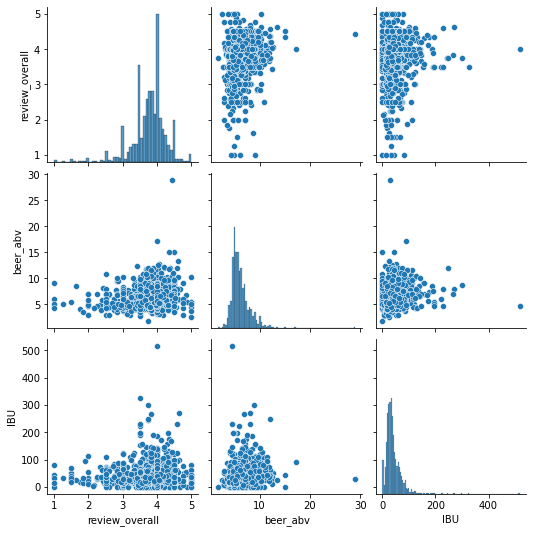

In [103]:
col = ["review_overall", "beer_abv","IBU"]
g = sb.pairplot(
    data=beersByName[col]
)

In [104]:
beersByRate =  beersByName.groupby('review_overall').mean()

In [105]:
beersByRate

,review_aroma,review_appearance,review_palate,review_taste,beer_abv,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
review_overall,,,,,,,,,,,,,
1.000000,1.600000,2.466667,1.600000,1.100000,6.100,1.639038,1.096448,5.463556,34.074000,8.270444,41.994667,66.666667,69.611111
1.250000,2.500000,3.500000,2.500000,1.250000,5.000,1.047000,1.009000,4.980000,31.860000,6.270000,30.660000,60.000000,70.000000
1.500000,1.916667,2.214286,1.738095,1.690476,5.500,1.064952,1.013333,6.754286,36.883333,14.426429,36.047619,65.000000,73.119048
1.625000,1.750000,2.875000,2.375000,2.000000,8.600,1.063000,1.014000,6.460000,25.380000,10.880000,67.190000,90.000000,75.000000
1.750000,2.250000,3.000000,2.500000,2.250000,4.000,1.055000,1.009500,5.975000,18.325000,4.465000,12.775000,60.000000,65.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.750000,4.339286,4.089286,4.208333,4.321429,5.460,1.060143,1.014714,5.980000,30.618571,6.236429,305.060714,70.714286,66.607143
4.800000,5.000000,4.300000,4.400000,4.900000,6.000,1.071500,1.016000,7.270000,50.340000,37.825000,32.490000,60.000000,67.500000
4.833333,4.416667,4.333333,4.500000,4.500000,6.700,1.063750,1.016000,6.227500,50.767500,14.145000,20.725000,60.000000,71.250000


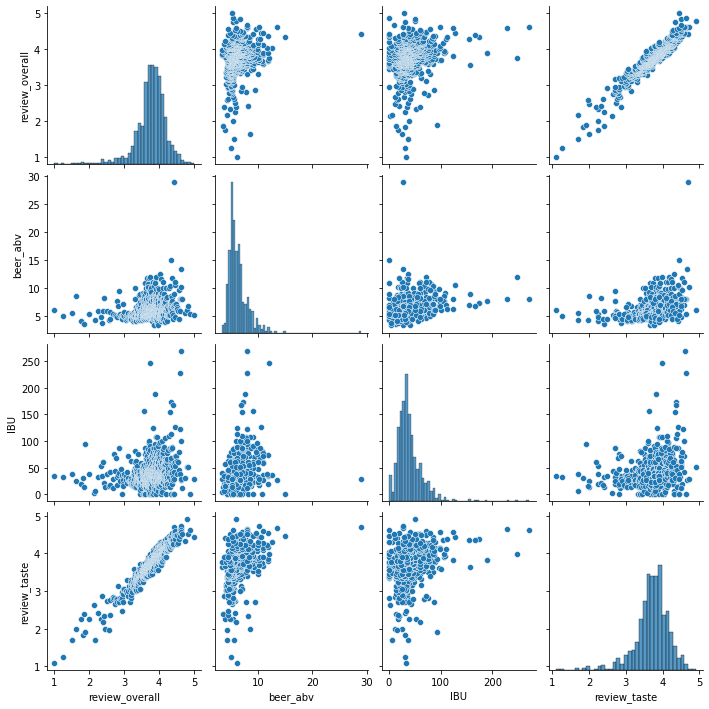

In [106]:
beersByRate = beersByRate.reset_index()
col = ["review_overall", "beer_abv", "IBU", "review_taste"]
g = sb.pairplot(
    data=beersByRate[col]
)

<AxesSubplot:>

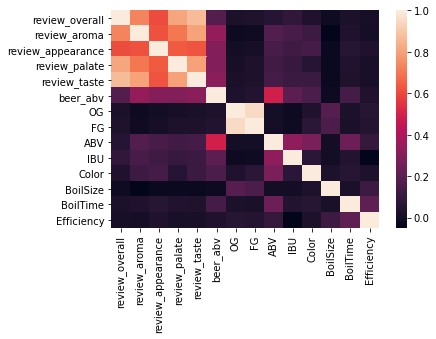

In [107]:
sb.heatmap(beersByName.corr())

In [109]:

beersByName.corr()["review_overall"].sort_values(ascending=False)

review_overall       1.000000
review_taste         0.867247
review_palate        0.814251
review_aroma         0.731748
review_appearance    0.609474
beer_abv             0.176895
IBU                  0.086274
ABV                  0.054998
Color                0.037074
FG                   0.035013
OG                   0.027845
BoilTime             0.024821
Efficiency           0.015177
BoilSize            -0.008599
Name: review_overall, dtype: float64

In [113]:
#beersByName = beersByName.drop(columns=["beer_abv"])
beersByName

,review_overall,review_aroma,review_appearance,review_palate,review_taste,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
beer_name,,,,,,,,,,,,,
#14,3.857143,3.785714,3.857143,3.714286,3.785714,7.305500,1.90087,6.015000,58.485000,7.425000,23.100000,65.000000,67.000000
#9,3.539528,3.434466,3.501040,3.398058,3.396671,13.099200,3.06868,5.380000,28.960000,47.970000,28.000000,60.000000,70.000000
'Tis The Saison,3.750000,3.250000,2.500000,4.000000,3.750000,1.048000,1.01100,4.890000,25.390000,7.690000,24.610000,60.000000,70.000000
4x4,4.000000,3.500000,3.666667,3.666667,3.833333,1.058000,1.01600,5.520000,63.340000,32.500000,25.000000,90.000000,83.000000
60 Minute IPA,4.172727,3.996768,3.966061,4.006667,4.118990,1.058000,1.01100,6.210000,65.700000,3.510000,22.000000,60.000000,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yule,3.500000,4.000000,4.000000,3.000000,4.000000,1.071000,1.01300,7.520000,54.700000,19.650000,11.360000,60.000000,80.000000
Yuletide Ale,3.923077,3.576923,3.769231,3.653846,3.730769,1.077000,1.01900,7.540000,20.590000,17.480000,6.000000,60.000000,35.000000
Zombie Dust,4.512723,4.543257,4.215013,4.258270,4.492366,1.063565,1.01600,6.233478,63.047391,8.803478,27.713913,63.913043,68.043478


In [114]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(3)

In [115]:
beer_transformed = svd.fit_transform(beersByName)

In [116]:
beer_transformed[:5]

array([[  47.73706585, -101.78636934,   12.05360603],
       [  50.93016399,  -92.6583959 ,  -15.6943952 ],
       [  45.84512031,  -86.09913448,  -17.25437605],
       [  56.83095757, -131.71121509,    3.22869096],
       [  41.65365859,  -81.95571339,   30.58437105]])

In [121]:
beer_transformed

array([[  47.73706585, -101.78636934,   12.05360603],
       [  50.93016399,  -92.6583959 ,  -15.6943952 ],
       [  45.84512031,  -86.09913448,  -17.25437605],
       ...,
       [  52.6925919 , -102.85711492,   16.11598906],
       [  38.95558204,  -98.98887083,   -7.15193377],
       [  24.44148834,  -76.87854992,  -10.94621406]])

In [124]:
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd
import numpy as np

In [125]:
df = pd.DataFrame(beer_transformed, columns=['N1', "N2", "N3"])

In [126]:
model = KMeans(n_clusters=5)
model.fit(df)
# assign a cluster to each example
yhat = model.predict(df)
# retrieve unique clusters
clusters = np.unique(yhat)
res = df.copy()
res["Cluster"] = yhat

In [133]:
fig = px.scatter_3d(res, x = 'N1', 
                    y = 'N2', 
                    z = 'N3',
                    color="Cluster")
  
fig.show()

In [134]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [135]:
db = DBSCAN(eps=0.3, min_samples=1).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2002
Estimated number of noise points: 0


In [136]:
labels

array([   0,    1,    2, ..., 1999, 2000, 2001], dtype=int64)

In [137]:
res2 = df.copy()
res2["Cluster"] = labels

In [139]:
fig = px.scatter_3d(res2, x = 'N1', 
                    y = 'N2', 
                    z = 'N3',
                    color="Cluster")
  
fig.show()

In [140]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=10,
        assign_labels="discretize",
        random_state=0).fit(df)
res3 = df.copy()
res3["Cluster"] = clustering.labels_

C:\Users\Oleh\.conda\envs\test\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [142]:
fig = px.scatter_3d(res3, x = 'N1', 
                    y = 'N2', 
                    z = 'N3',
                    color="Cluster")
  
fig.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = happiness2[[
    'Happiness Rank',
'Military Expenditure',
'Mean years of schooling',
'Gross national income (GNI) per capita',
'GNI per capita rank minus HDI rank',
'Gender Development Index Group',
'Life expectancy at birth Female',
'Life expectancy at birth Male',
'Mean years of schooling Female',
'Mean years of schooling Male',
'Estimated gross national income per capita Female',
'Estimated gross national income per capita Male',
'Share of seats in parliament (% held by women)',
'Labour force participation rate (% ages 15 and older) Female ',
'Population Urban 2015 %',
'Population Under age 5 (millions) 2015',
'Population Ages 65 and older (millions) 2015',
'Population Median age (years) 2015',
'Dependency Ration Young age (0–14) /(per 100 people ages 15–64)',
'Dependency Ratio Old age (65 and older) /(per 100 people ages 15–64)',
'Infants lacking immunization DTP (% of one-year-olds)',
'Infants lacking immunization Measles (% of one-year-olds)',
'Mortality rates Infant (per 1,000 live births) 2015',
'Mortality rates Under-five (per 1,000 live births) 2015',
'Employment to population ratio (% ages 15 and older) ',
'Labour force participation rate (% ages 15 and older)',
'Total Unemployment (% of labour force) 2015',
'Mandatory paid maternity leave (days)',
'Inequality-adjusted HDI (IHDI) Over loss(%)',
'Difference from HDI rank',
'Coefficient of human inequality',
'Inequality in education(%)',
'Inequality in income (%)']][:133]
y = happiness2['HDI Rank'][:133]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
print("Train score: ", clf.score(X, y))
print("Test score: ", clf.score(X_test, y_test))